<a href="https://colab.research.google.com/github/nithinrk11/Connecting-Dreams-Foundation-and-_VOIC-for-tech-Data-Analysis-Internship/blob/main/_VOIC_for_tech_SuperStoreDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> ## **Problem Statement:**
Optimising Superstore dataset in its business operations by understanding sales patterns, profitability across different regions, categories, and customer segment performance to make data-driven decisions for improving business efficiency and profitability.

>## **Project Description:**
This analysis examines sales data from a Superstore, focusing on:

  * Regional sales and profits distribution
  * Category-wise sales and profits distribution
  * Customer segment analysis
  * Impact of discounts on profits
  * Overall business performance metrics



>## **End Users:**

   * Store managers and administrators
   * Sales team
   * Marketing department
   * Business strategists
   * Category managers

In [ ]:
#Installing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!git clone https://github.com/nithinrk11/Connecting-Dreams-Foundation-and-_VOIC-for-tech-Data-Analysis-Internship.git
%cd Connecting-Dreams-Foundation-and-_VOIC-for-tech-Data-Analysis-Internship

Cloning into 'Connecting-Dreams-Foundation-and-_VOIC-for-tech-Data-Analysis-Internship'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 167.94 KiB | 1.23 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/Connecting-Dreams-Foundation-and-_VOIC-for-tech-Data-Analysis-Internship


In [ ]:
df = pd.read_csv('/content/Connecting-Dreams-Foundation-and-_VOIC-for-tech-Data-Analysis-Internship/Datasets/1719219914-Analysis of Super Store - DA (1).csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


##Let us understand the dataset
>we'll find the unique values in each non numerical columns

In [ ]:
print(df["Ship Mode"].unique())
print(df["Segment"].unique())
print(df["Country"].unique())
print(df["Region"].unique())
print(df["Category"].unique())
print(df["Sub-Category"].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['South' 'West' 'Central' 'East']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


> * We now know that the dataset contains only sales data of one country i.e., `United States` and it does cover all states through out `South, West, Central, and East` regions of the nation.
* The type of ship modes are: `Second Class, Standard Class, First class, and Same Day`.
* The Segment types are: `'Consumer' 'Corporate' 'Home Office'`.
* The Product categories are: `'Furniture' 'Office Supplies' 'Technology'`. and their sub-categories are: `'Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers'`.

In [ ]:
#Droping Postal Code since it does not contribute much to our objective
df.drop(['Postal Code'], inplace=True, axis=1)

In [ ]:
df.shape

(9994, 12)

* Now we have 9994 rows and 12 columns in the dataset

Let us now analyse the numerical columns

In [ ]:
#statistical Description
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


In [ ]:
print(df.isna().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


>* We can see the dataset does not have any missing values, which is good for us. let's analyse the data in depth.

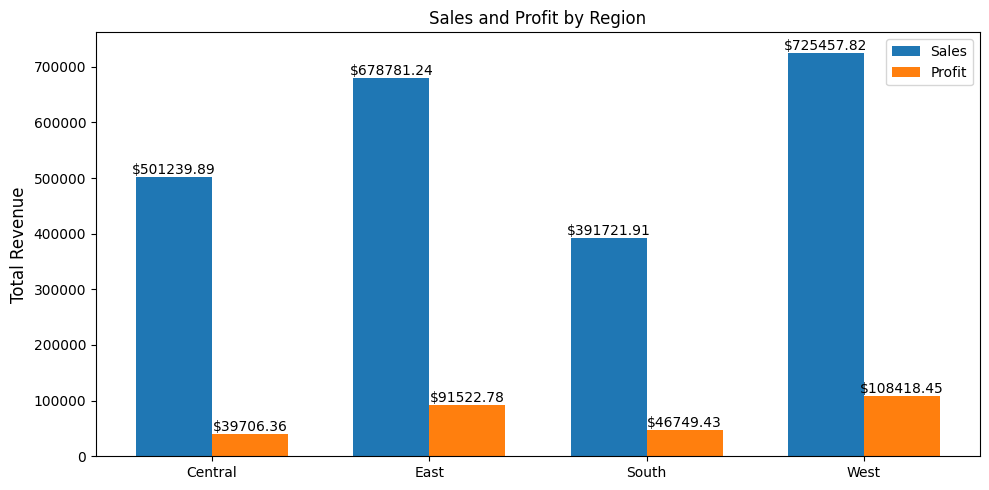

In [ ]:
# @title Sales and Profit by Region
# Create parallel bar plots with labels
fig, (ax1) = plt.subplots(figsize=(10, 5))

# Region plot
region_df = df.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
x = range(len(region_df['Region']))
width = 0.35

ax1.bar([i - width/2 for i in x], region_df['Sales'], width, label='Sales')
ax1.bar([i + width/2 for i in x], region_df['Profit'], width, label='Profit')
ax1.set_xticks(x)
ax1.set_xticklabels(region_df['Region'])
ax1.set_title('Sales and Profit by Region')
ax1.set_ylabel('Total Revenue', fontsize=12)
ax1.legend()
# Add labels
for i in x:
    ax1.text(i - width/2, region_df['Sales'][i], f"${region_df['Sales'][i]:.2f}", ha='center', va='bottom')
    ax1.text(i + width/2, region_df['Profit'][i], f"${region_df['Profit'][i]:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

Text(0, 0.5, '')

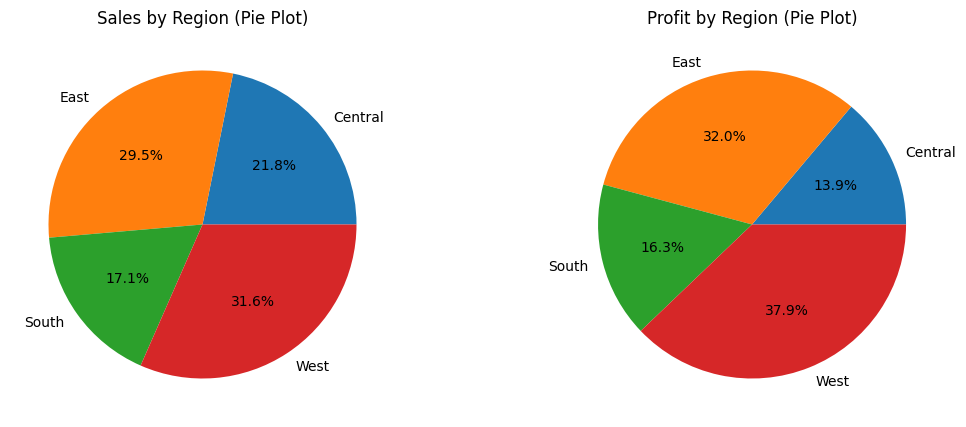

In [ ]:
# @title Percentage of Sales and Profits by region

#Create subplots
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Pie plot
df.groupby('Region')['Sales'].sum().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Sales by Region (Pie Plot)')
axes[0].set_ylabel('')

# Pie plot
df.groupby('Region')['Profit'].sum().plot.pie(autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Profit by Region (Pie Plot)')
axes[1].set_ylabel('')

>*  We see that Eastern and Western regions has the most sales followed by Central and South. Out of which Western region makes 31.6% percent out of total sales making it the leading region in sales.

> * Here in  Profits by Region we can see that Western region makes the most profits i.e., 37.9% out of total profits followed by Eastern region with 32% of profits. But the key point to notice is that although Central region was top 3rd sales maker but it falls behind in making profits.
*As Central region made more sales than Southern region but made less profits than Southern region, this difference has to be closely observed further.

----

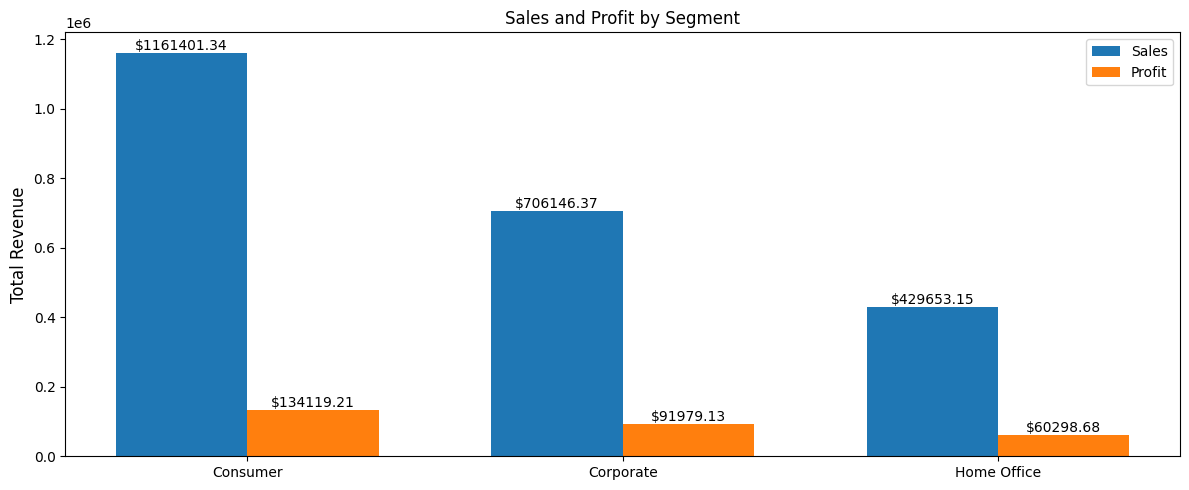

In [ ]:
# @title Sales and Profit by Segment
# Create parallel bar plots with labels
fig, (ax2) = plt.subplots(figsize=(12, 5))

# Segment plot
segment_df = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
x = range(len(segment_df['Segment']))

ax2.bar([i - width/2 for i in x], segment_df['Sales'], width, label='Sales')
ax2.bar([i + width/2 for i in x], segment_df['Profit'], width, label='Profit')
ax2.set_xticks(x)
ax2.set_xticklabels(segment_df['Segment'])
ax2.set_title('Sales and Profit by Segment')
ax2.set_ylabel('Total Revenue', fontsize=12)
ax2.legend()

# Add labels
for i in x:
    ax2.text(i - width/2, segment_df['Sales'][i], f"${segment_df['Sales'][i]:.2f}", ha='center', va='bottom')
    ax2.text(i + width/2, segment_df['Profit'][i], f"${segment_df['Profit'][i]:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

Text(0, 0.5, '')

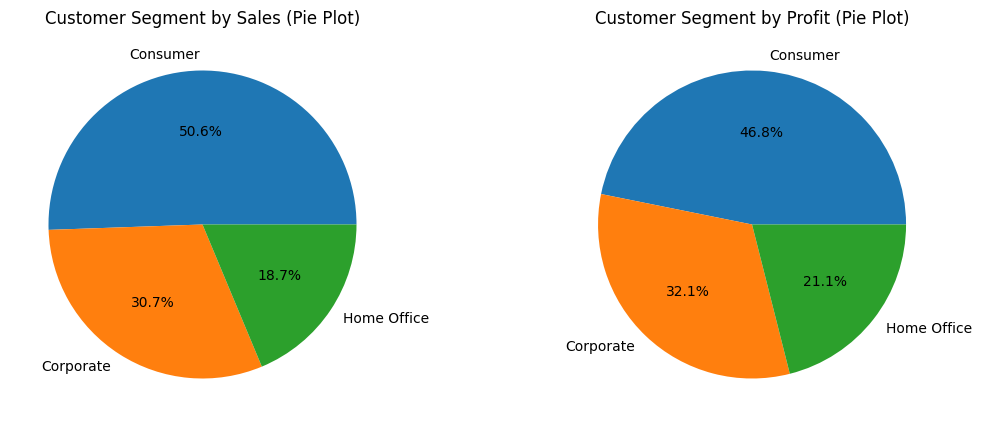

In [ ]:
# @title Percentage of Sales and Profits for different Segments
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Pie plot
df.groupby('Segment')['Sales'].sum().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Customer Segment by Sales (Pie Plot)')
axes[0].set_ylabel('')

# Pie plot
df.groupby('Segment')['Profit'].sum().plot.pie(autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Customer Segment by Profit (Pie Plot)')
axes[1].set_ylabel('')

> The Consumer Segment customers are notably the most involved in sales with 50.6% of total sales followed by Corporate with 30.7% and Home Office with 18.7% of total sales.

> Similarly to Sales Consumer Segment customers contributes to the most profit with 46.8% out of total profits, followed by Corporate customers with 32.1% and Home Offices Segment customers with 21.2% profits.

We will now analyse how each categories perform in terms of sales and profits.

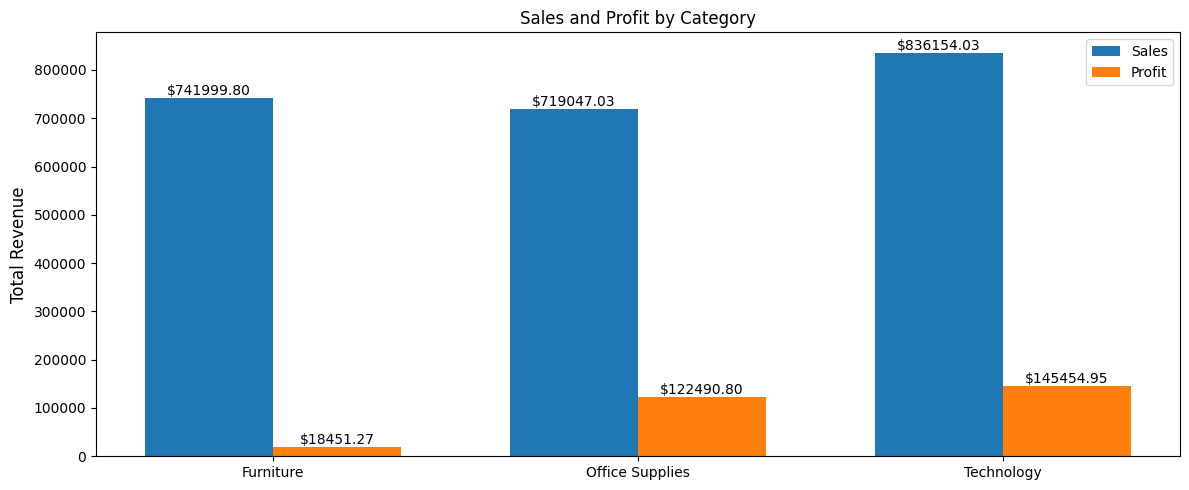

In [ ]:
# @title Sales and Profit by Category
# Create parallel bar plots with labels
fig, (ax3) = plt.subplots(figsize=(12, 5))
# Category plot
category_df = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
x = range(len(category_df['Category']))

ax3.bar([i - width/2 for i in x], category_df['Sales'], width, label='Sales')
ax3.bar([i + width/2 for i in x], category_df['Profit'], width, label='Profit')
ax3.set_xticks(x)
ax3.set_xticklabels(category_df['Category'])
ax3.set_title('Sales and Profit by Category')
ax3.set_ylabel('Total Revenue', fontsize=12)
ax3.legend()

# Add labels
for i in x:
    ax3.text(i - width/2, category_df['Sales'][i], f"${category_df['Sales'][i]:.2f}", ha='center', va='bottom')
    ax3.text(i + width/2, category_df['Profit'][i], f"${category_df['Profit'][i]:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

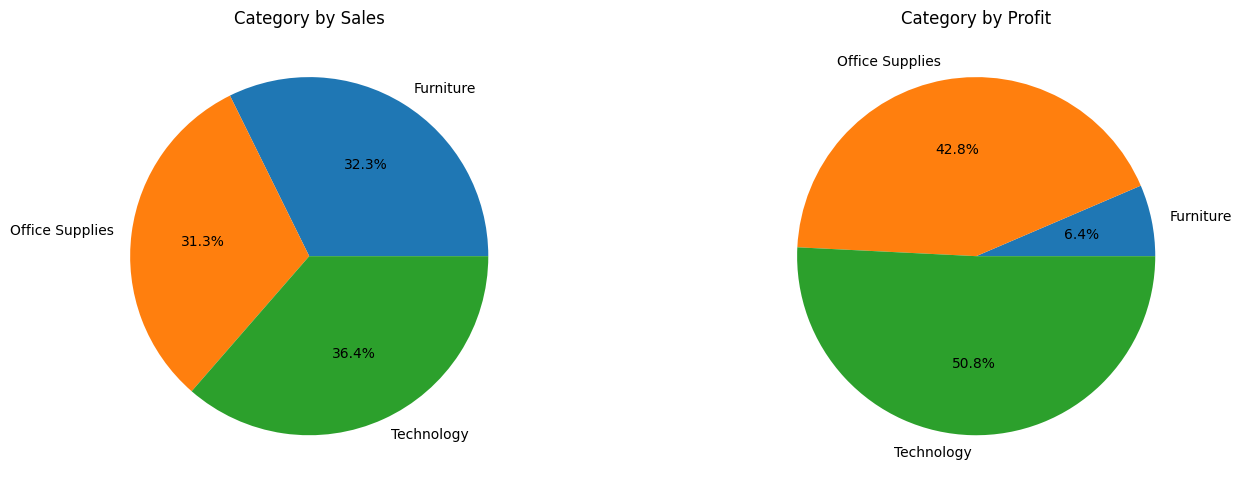

In [ ]:
# @title Percentage of Sales and Profit by Category
# Create subplots with 2 columns for only the pie charts
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjust figure width and height as needed

# Pie plot for Sales by Category
df.groupby('Category')['Sales'].sum().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Category by Sales')
axes[0].set_ylabel('')  # Remove y-axis label for clarity

# Pie plot for Profit by Category
df.groupby('Category')['Profit'].sum().plot.pie(autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Category by Profit')
axes[1].set_ylabel('')  # Remove y-axis label for clarity

# Adjust layout
plt.tight_layout()
plt.show()

> We can observe that technology category products has the most 836154.03\$  sales and 145454.95\$ profits followed by office supplies and furniture in profits, but in sales all three categories has almost the same percentage in sales

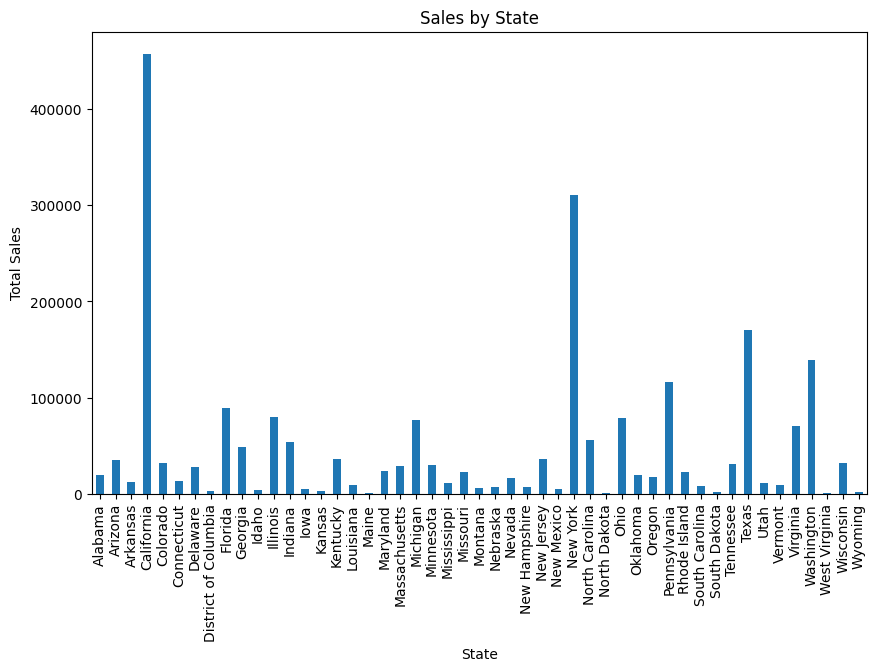

In [ ]:
# @title Sales by States
plt.figure(figsize=(10, 6))
df.groupby('State')["Sales"].sum().plot.bar()
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()

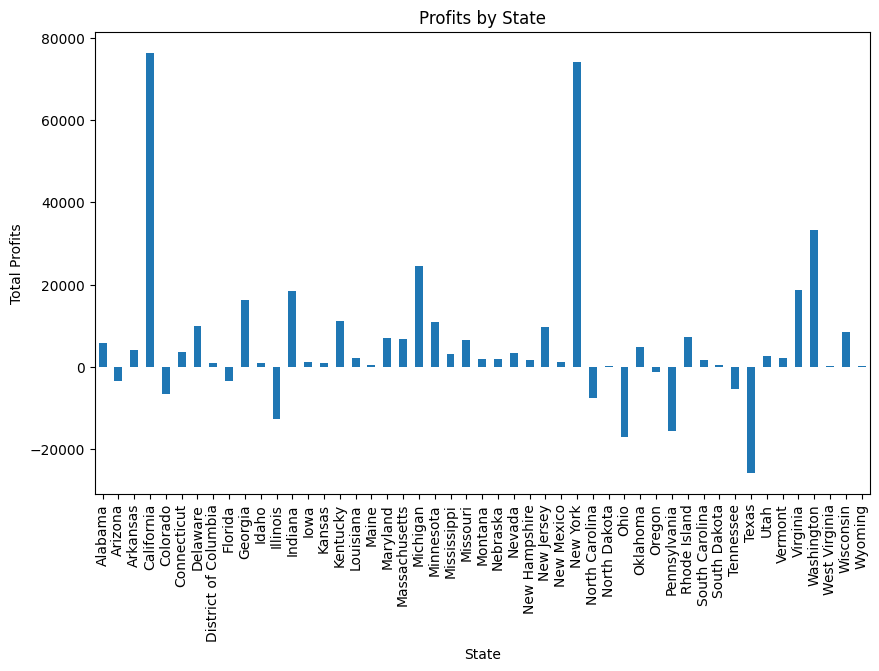

In [ ]:
# @title Profits by States
plt.figure(figsize=(10, 6))
df.groupby('State')["Profit"].sum().plot.bar()
plt.title('Profits by State')
plt.xlabel('State')
plt.ylabel('Total Profits')
plt.show()

> In terms of Sales of Profits with respect to various states of the country, California and New York are the best performers and texas makes the least profits

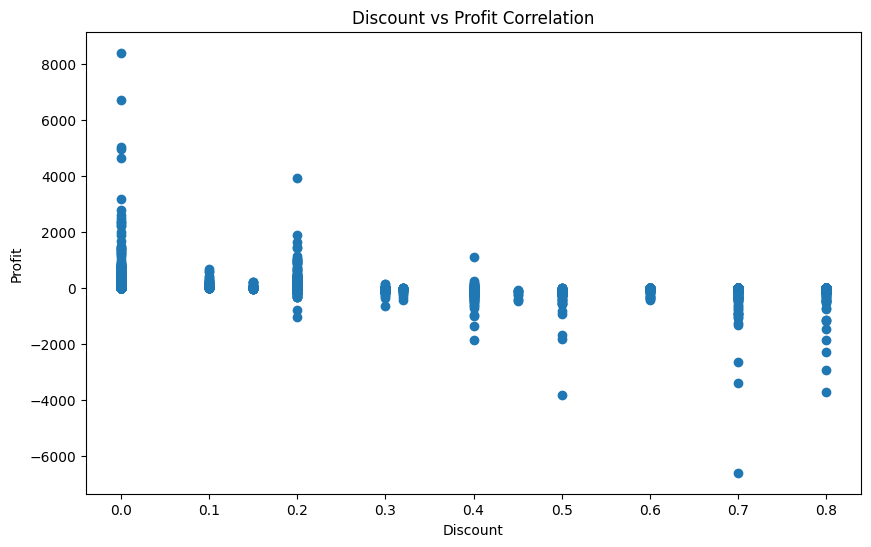

In [ ]:
# 4. Correlation Analysis
plt.figure(figsize=(10, 6))
plt.scatter(df['Discount'], df['Profit'])
plt.title('Discount vs Profit Correlation')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()



In [ ]:
# Calculate key metrics
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
profit_margin = (total_profit / total_sales) * 100
total_orders = len(df)

print('Key Performance Metrics:')
print('Total Sales: $', round(total_sales, 2))
print('Total Profit: $', round(total_profit, 2))
print('Profit Margin: ', round(profit_margin, 2), '%')
print('Total Orders: ', total_orders)


Key Performance Metrics:
Total Sales: $ 2297200.86
Total Profit: $ 286397.02
Profit Margin:  12.47 %
Total Orders:  9994


In [ ]:
# Top performing categories
print('\nTop Performing Categories by Sales:')
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
for category, sales in sales_by_category.items():
    print(f"{category}: ${sales:.2f}")


Top Performing Categories by Sales:
Technology: $836154.03
Furniture: $741999.80
Office Supplies: $719047.03


In [ ]:
#Customer Segment Performance:
segment_sales = df.groupby('Segment')['Sales'].sum()
# Print the segment-wise sales with proper formatting
print("Segment-wise Sales:")
for segment, sales in segment_sales.items():
  print(f"{segment:<12}: ${sales:.2f}")

Segment-wise Sales:
Consumer    : $1161401.34
Corporate   : $706146.37
Home Office : $429653.15


>## **Results:**

 ### Sales and Profit Overview:
     
* Total Sales: \$2,297,200.86
* Total Profit: \$286,397.02
* Overall Profit Margin: 12.47\%
* Total Orders: 9,994   

>## **Conclusion:**

Technology is the highest-performing category with sales of \$836,154, followed by Furniture and Office Supplies
Consumer segment leads in sales (\$1,161,401), representing about 50% of total sales
There's a negative correlation between discounts and profits, suggesting careful discount strategy is needed
The overall profit margin of 12.47% indicates room for improvement in operational efficiency.
<!-- Recommendations:

Focus on expanding the Technology category due to its superior performance
Develop targeted marketing strategies for the Consumer segment
Review and optimize discount policies to maintain profitability
Investigate opportunities to improve profit margins in the Furniture category -->
